In [3]:
# loading the libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import imageio
import sys
import cv2 as cv
from PIL import Image
from scipy import ndimage
import random
import math
from skimage.color import gray2rgb
import scipy

Long answers (Programming Questions) (please submit a Google Colab link

# Question 1 (10pts) Basic image processing with Python.  Write Python code to do the following. 
1. Read in an image into Python as a matrix, and write down its dimensions. For instance, you can use Georgetown.jpg in the folder.  
2. Convert the image into grayscale. You can use the image attached in the exam folder. 

In [2]:
from google.colab import files
uploadImg = files.upload()

Saving Georgetown.jpeg to Georgetown.jpeg
Saving noise.png to noise.png
Saving photoshopDC.jpg to photoshopDC.jpg
Saving WashingtonDCp.jpeg to WashingtonDCp.jpeg


The dimension is (543, 815)


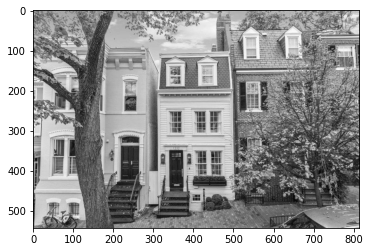

In [4]:
img1 = imageio.imread('Georgetown.jpeg', as_gray = True)
plt.figure()
plt.imshow(img1, cmap='gray')
print("The dimension is {}".format(img1.shape))

3. Find the darkest pixel in the image, and write its value and [row, column] in your answer sheet. Hint: Convert to a vector first, and use numpy.flatten.
- In grayscale, the darkest "color" should be 0, which is black. 

In [5]:
# solution 1
darkest = min(img1.flatten())
# print(img1.shape)
# print(img1.flatten())

print("The darkest picel is", darkest)
res = []
# print(type(img[0][0]))

for idx_0, i in enumerate(img1):
  for idx_1, j in enumerate(i):
    if j == darkest:
      res=(idx_0,idx_1)
res = np.array(res)
print(f"[row, column] is {res}")
print("[row, column] is {}".format(res))

The darkest picel is 0.0
[row, column] is [382 742]
[row, column] is [382 742]


In [6]:
# solution 2
def ind2sub(array_shape, ind):
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    rows = (ind.astype('int') / array_shape[1])
    cols = ind % array_shape[1]
    return (rows, cols)

img1Vector = img1.flatten()
print(img1Vector)
[row, col] = ind2sub(np.shape(img1), np.argwhere(img1Vector == darkest))
print(row, col)

[174.177 139.391 114.281 ... 135.813 168.813 160.813]
[[382.91042945]] [[742]]


4. Use the function numpy.sum and a logical operator measuring equality to a scalar, to determine and write down how many pixels in the grayscale image equal the value 6.

In [7]:
img1Vector = img1.flatten()
pxEqSix = np.sum(6 == img1Vector)

print("There are {} pixels equal to 6 in the grayscale image".format(pxEqSix))

There are 1 pixels equal to 6 in the grayscale image


5. Consider a 31x31 square (a square with side equal to 31 pixels) that is centered on the darkest pixel. Replace all pixels in that square with white pixels (pixels with value 255). Do this with loops.



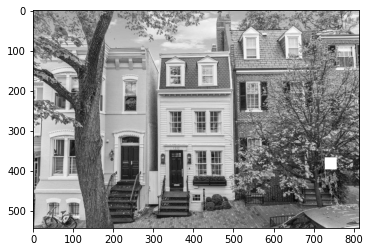

In [8]:
for i in range(res[0]-15, res[0]+15):
  for j in range(res[1]-15,res[1]+15):
    img1[i][j] = 255
plt.imshow(img1, cmap= "gray")

6. Now use the code you wrote above to find one of several pixels with value 6. Find which of those pixels are at least 15 pixels away from the border of the image in any direction (not including the 6-valued pixel itself). You can use loops. Let's call these 15-away 6-valued pixels `inds` (you don't have to call them this in your code).


In [9]:
imgWidth = len(img1)
imgHeight = len(img1[0])
ind=[]
count = 0

for idx_0, i in enumerate(img1):
  for idx_1, j in enumerate(i):
    if idx_0 < 15 or idx_0 > imgWidth-15 and idx_1 < 15 or idx_1 > imgHeight-15: # set the border as a codition
      continue
    else :
      if j == 6:
        ind.append((idx_0,idx_1))
        count += 1
print("The summation of 15 pixels away is {}, and the [row, col] is {}".format(count, ind))
print(ind)

The summation of 15 pixels away is 1, and the [row, col] is [(482, 192)]
[(482, 192)]


7. Write code to randomly choose one of the `inds` pixels.


In [10]:
rdChoice = random.choice(ind)
rdx = rdChoice[0]
rdy = rdChoice[1]
print("randomly inds pixel is row {} column {}".format(rdx, rdy))

randomly inds pixel is row 482 column 192


8. Now consider another 31x31 square, but this time gray (e.g. with pixel values 150). Take the image with the white square in it. Replace the randomly chosen pixel from above, and the 31x31 square in the image that's centered on this pixel, with the gray square. This time you are NOT allowed to use loops. Note that you shouldn't run into border issues because of the 15-away code you wrote above.


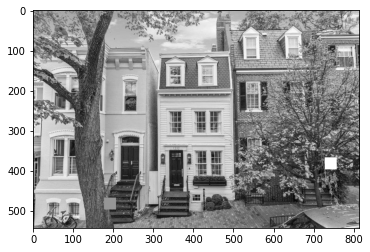

In [11]:
# let me show you guys how to slice
img1[rdx-15:rdx+15,rdy-15:rdy+15] = 150

# show the img
plt.imshow(img1, cmap= "gray")

9. Make a new figure, display the modified image (which includes both a white square and gray square), and save it to a file using pyplot. savefig(gcf, 'new_image.png').

In [12]:
plt.figure()
plt.imsave("new_image.png", img1)

<Figure size 432x288 with 0 Axes>

# Question 2 (15pts) 

a. Implement an algorithm to sharpen a blurred image.  You can get a blurred image by filtering an original image with a low-pass filter or shoot an image in low light or without focus. You are not allowed to use OpenCV or existing sharpening operators.   Hint: You can do this via filtering in space domain or manipulating the image’s Fourier Spectrum.   You can find the blurred image in the attached folder.   Display your results and compare the methods.   Please return a sharpened color image. Compare your results with Photoshop.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

(483, 724, 3)


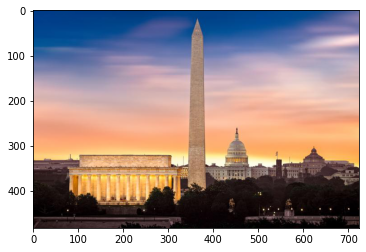

In [14]:
imgColor = imageio.imread('WashingtonDCp.jpeg')
plt.figure()
plt.imshow(imgColor)
print(imgColor.shape)

(483, 724)


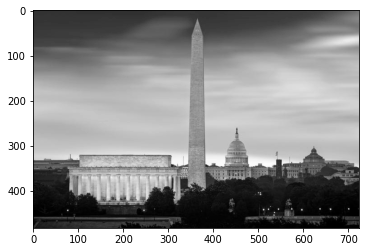

In [15]:
img = imageio.imread('WashingtonDCp.jpeg', as_gray = True)
plt.figure()
plt.imshow(img, cmap='gray')
print(img.shape)

# Get a blurred image by filtering an original image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(483, 724)


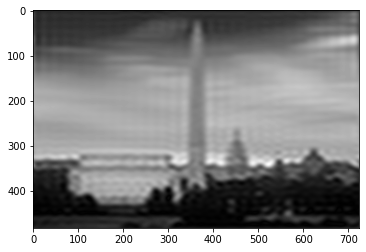

In [23]:
# Remove the high frequecies: center == 1

f = np.fft.fft2(img)
dft_shift = np.fft.fftshift(f)

rows, cols = img.shape
crows, ccols = round(rows/2), round(cols/2) # centralized

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols), np.uint8) # np.uint8 = Unsigned integer (0 to 255)
mask[crows-30:crows+30, ccols-30:ccols+30] = 1 

# apply mask and inverse DFT
fshift = mask*dft_shift
magnitude_spectrum = 30*np.log(np.abs(fshift))
f_shift = np.fft.ifftshift(fshift) # The inverse of fftshift
img_back = np.fft.ifft2(f_shift) # Compute the 2-dimensional inverse discrete Fourier Transform
DC_blurred = np.abs(img_back) # must be positive values

plt.imshow(DC_blurred, cmap = "gray")
print(DC_blurred.shape)


# Sharpen -  using High pass filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(Text(0.5, 1.0, 'High Pass Filter'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

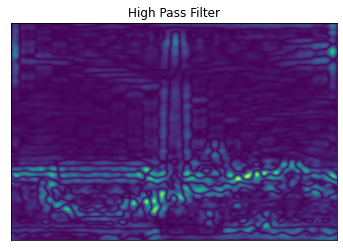

In [24]:
f = np.fft.fft2(DC_blurred)
fshift = np.fft.fftshift(f)
rows, cols = DC_blurred.shape
# print(rows, cols) 

# center pixel of the img
centerRow, centerCol = round(rows/2), round(cols/2) # slice indices must be integers or None or have an __index__ method

mask = np.ones((rows, cols), np.uint8)
mask[centerRow-10: centerRow+10, centerCol-10:centerCol+10] = 0
fshift = mask * fshift


# print(fshift.max(),fshift.min())
magnitude_spectrum = 30*np.log(np.abs(fshift))
f_shift = np.fft.ifftshift(fshift) # The inverse of fftshift
img_back = np.fft.ifft2(f_shift) # Compute the 2-dimensional inverse discrete Fourier Transform
DC_shapern = np.abs(img_back) # must be positive values

# plot
plt.imshow(DC_shapern)
plt.title('High Pass Filter'), plt.xticks([]), plt.yticks([])

# Attempting to recover a color image
When we remove the low pass, we can see that the image becomes clearer. I don't have Photoshop, but I'm attempting to merge the shapern image from code with the original image. Although the color is a little off, we can see that each pixel is very clear when compared to the blurred image.

(Text(0.5, 1.0, 'Sharpen by IPhone'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

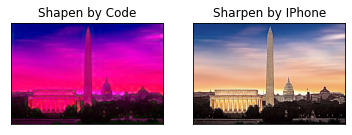

In [18]:
DC_blurred = np.array(DC_blurred, dtype=np.uint8)
DC_shapern = np.array(DC_shapern, dtype=np.uint8)

# split from the original image
imgR,imgG,imgB = cv.split(imgColor)
sharpenByCode = cv.merge((imgR, DC_shapern, imgB))

# read a Photoshop's shapen image 
sharpenByPhotoshop = imageio.imread('photoshopDC.jpg')
plt.figure()
# print(sharpenByPhotoshop.shape)

# comparsion
plt.subplot(121),plt.imshow(sharpenByCode)
plt.title('Shapen by Code'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharpenByPhotoshop )
plt.title('Sharpen by IPhone'), plt.xticks([]), plt.yticks([])

Take a blurry or noisy image (shooting in low light is a good way to get both) and try to improve their appearance and legibility using Python code.   Hint: To deblur, you can do a de-convolution such as inverting the convolution process.  To remove noises, consider a median filter.  Comment on the effects of your methods on the images. 

# Denosing Image

(200, 201)


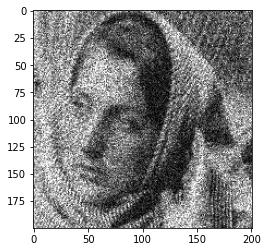

In [19]:
noiseImg = imageio.imread('noise.png', as_gray = True)
print(noiseImg.shape)
plt.imshow(noiseImg, cmap="gray")

# Median Filter

A median filter selects the median intensity in a window to operate on. Looking at the $3*3$ median filter below, we can see that there is still some noise in the image, so we consider trying the $5*5$ filter. As a result, $5*5$ is better than $3*3$.

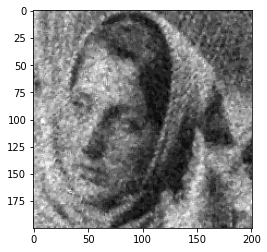

In [20]:
# 3*3 kernal
a = ndimage.median_filter(noiseImg, 3)
plt.imshow(a,cmap="gray")

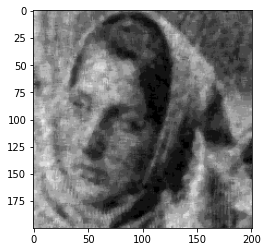

In [21]:
# 3*3 kernal doesn't look good, let's try 5*5
b = ndimage.median_filter(noiseImg, 5)
plt.imshow(b, cmap="gray")

In [22]:
a = np.array([1,-1,1,-1,1,-1,1,-1])
b = np.fft.fft(a)
c = np.array([-1, -1, -1, -1])
d = np.fft.fft(c)
# print(b)
print(d)

[-4.+0.j  0.+0.j  0.+0.j  0.+0.j]
